In [15]:
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import re

In [6]:
def analyze_python_programmers(file_path):
    age_categories = defaultdict(int)

    with open(file_path, "r", encoding="utf-8") as file:
        csvreader = csv.reader(file)
        header = next(csvreader)  # Get column headers
        next(csvreader)
        # Identify relevant columns
        age_index = header.index('Q1')

        for row in csvreader:
            age_category = row[age_index].strip()

            if row[7].strip():
                age_categories[age_category] += 1

    return age_categories


def plot_age_distribution(age_categories):
    categories = list(age_categories.keys())
    counts = list(age_categories.values())

    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.xlabel('Age Categories')
    plt.ylabel('Number of Respondents')
    plt.title('distributia respondentilor care programeaza in Python pe categorii de varsta')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

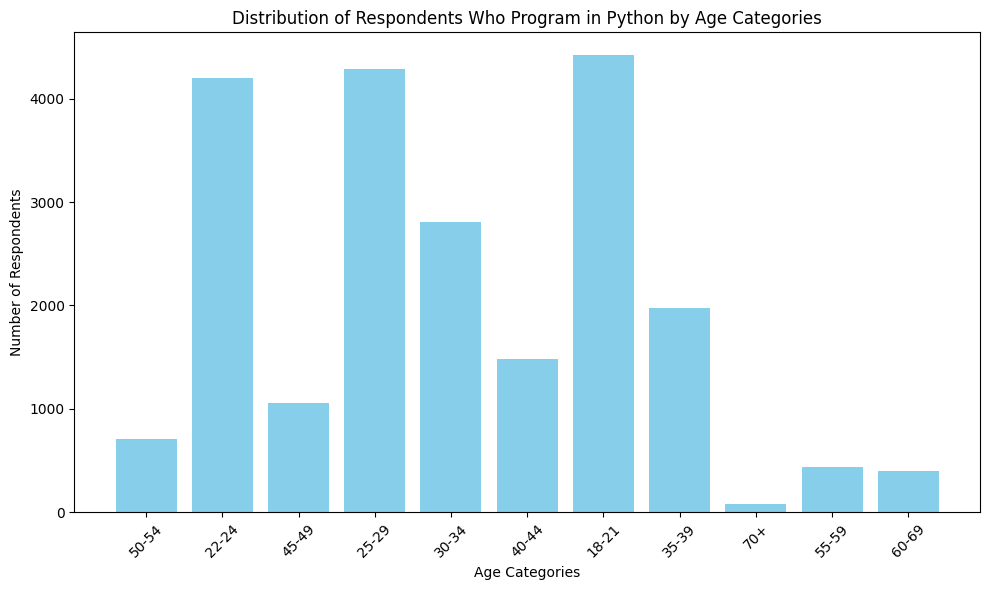

In [10]:
file_path = "data/surveyDataSience.csv"
age_categories = analyze_python_programmers(file_path)
plot_age_distribution(age_categories)



    

In [11]:
def analyze_python_programmers_ro(file_path):
    age_categories = defaultdict(int)

    with open(file_path, "r", encoding="utf-8") as file:
        csvreader = csv.reader(file)
        header = next(csvreader)  # Get column headers
        next(csvreader)
        # Identify relevant columns
        age_index = header.index('Q1')

        for row in csvreader:
            age_category = row[age_index].strip()
            country = row[3].strip().lower()

            if row[7].strip() and country == 'romania':
                age_categories[age_category] += 1

    return age_categories


def plot_age_distribution_py_ro(age_categories):
    categories = list(age_categories.keys())
    counts = list(age_categories.values())

    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.xlabel('Age Categories')
    plt.ylabel('Number of Respondents')
    plt.title('distributia respondentilor din Romania care programeaza in Python pe categorii de varsta')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

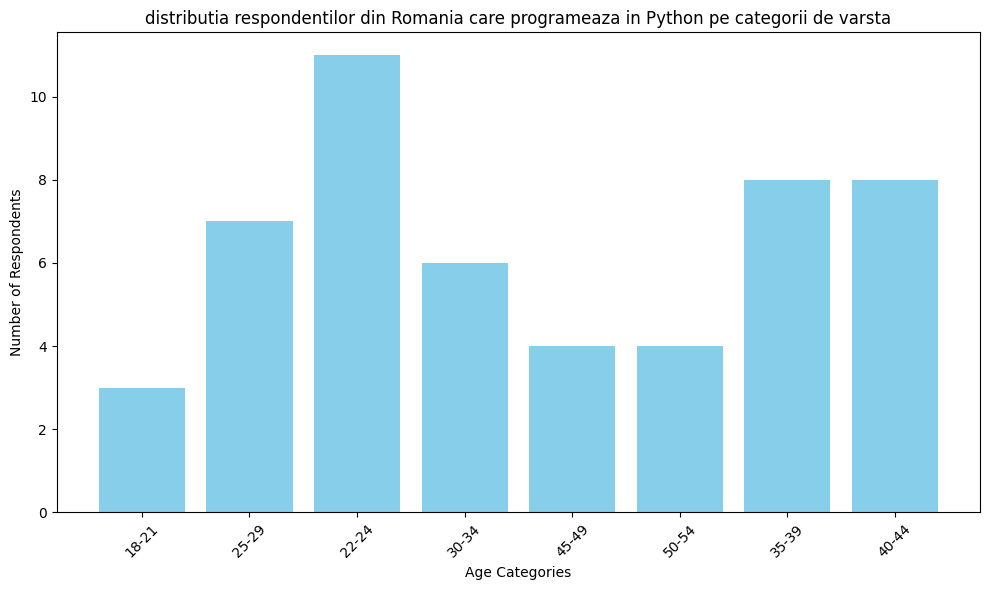

In [12]:
file_path = "data/surveyDataSience.csv"
age_categories = analyze_python_programmers_ro(file_path)
plot_age_distribution_py_ro(age_categories)


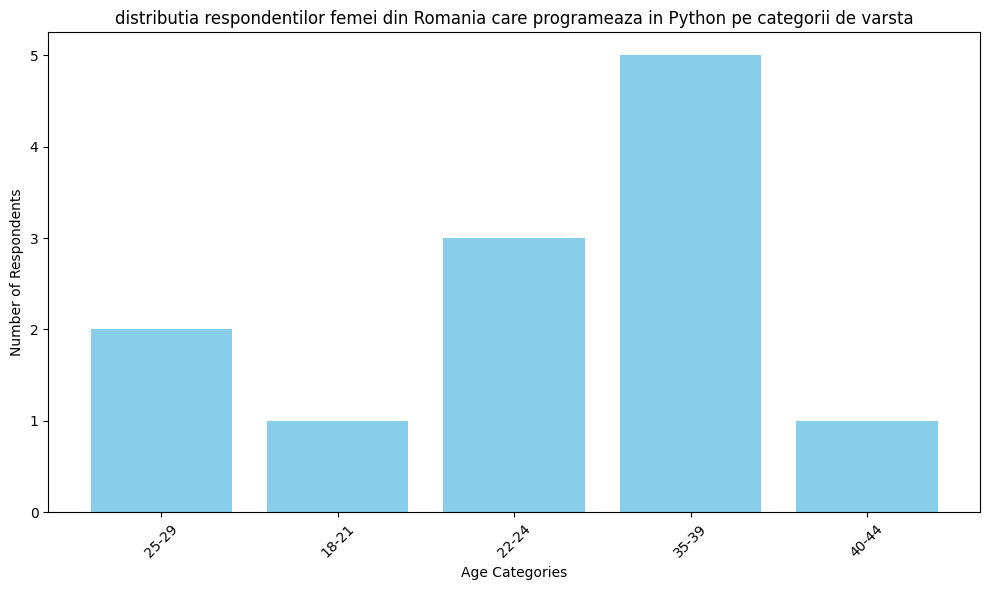

In [13]:
def analyze_python_programmers_ro(file_path):
    age_categories = defaultdict(int)

    with open(file_path, "r", encoding="utf-8") as file:
        csvreader = csv.reader(file)
        header = next(csvreader)  # Get column headers
        next(csvreader)
        # Identify relevant columns
        age_index = header.index('Q1')

        for row in csvreader:
            age_category = row[age_index].strip()
            country = row[3].strip().lower()
            gender = row[2].strip().lower()

            if row[7].strip() and country == 'romania' and gender == 'woman':
                age_categories[age_category] += 1

    return age_categories


def plot_age_distribution_py_ro(age_categories):
    categories = list(age_categories.keys())
    counts = list(age_categories.values())

    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.xlabel('Age Categories')
    plt.ylabel('Number of Respondents')
    plt.title('distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


file_path = "data/surveyDataSience.csv"
age_categories = analyze_python_programmers_ro(file_path)
plot_age_distribution_py_ro(age_categories)

Min: 0.0 years
Max: 25.0 years
Mean: 5.28 years
Standard Deviation: 6.79 years
Median: 2.0 years
Outliers identificati: [1. 1. 1. ... 1. 1. 1.]


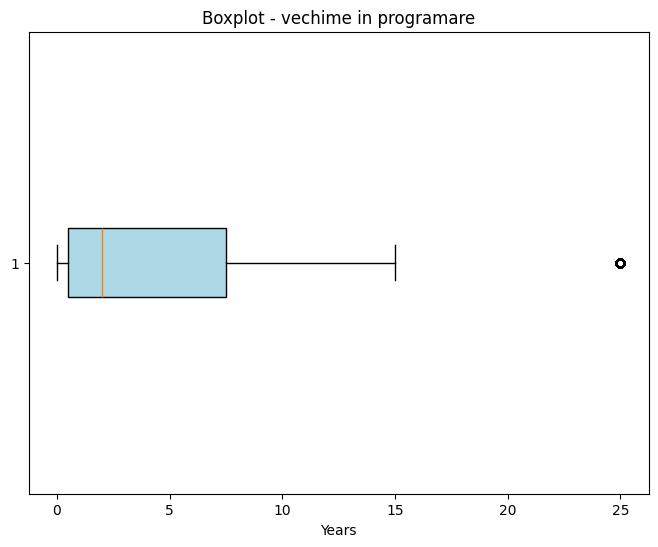

In [27]:



def transform_experience(experience):
    if experience == 'I have never written code':
        return 0
    elif experience == '20+ years':
        return 25
    elif experience == '< 1 years':
        return 0.5
    else:
        match = re.match(r'(\d+)-(\d+) years', experience)
        if match:
            start, end = map(int, match.groups())
            return (start + end) / 2
    return None

def analyze_experience(file_path):
    experiences = []

    with open(file_path, "r", encoding="utf-8") as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        next(csvreader)

        q6_index = header.index('Q6')

        for row in csvreader:
            experience = row[q6_index].strip()
            transformed_experience = transform_experience(experience)
            if transformed_experience is not None:
                experiences.append(transformed_experience)

    # Calculate statistics
    experiences = np.array(experiences)
    minimum = np.min(experiences)
    maximum = np.max(experiences)
    mean = np.mean(experiences)
    std_dev = np.std(experiences)
    median = np.median(experiences)
    print(f"Min: {minimum} years")
    print(f"Max: {maximum} years")
    print(f"Mean: {mean:.2f} years")
    print(f"Standard Deviation: {std_dev:.2f} years")
    print(f"Median: {median} years")
 # Boxplot
    plt.figure(figsize=(8, 6))
    box = plt.boxplot(experiences, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    plt.title('Boxplot - vechime in programare')
    plt.xlabel('Years')

    # Outliers extracted from fliers of the boxplot
    outliers = box['fliers'][0].get_ydata() if box['fliers'] else []

    print(f"Outliers identificati: {outliers}")

    plt.show()
    
    
    return minimum, maximum, mean, std_dev, median, outliers

def main():
    file_path = "data/surveyDataSience.csv"
    analyze_experience(file_path)

if __name__ == "__main__":
    main()